# 1. 모듈 임포트

In [1]:
# 데이터 전처리 패키지
import numpy as np
import pandas as pd

# 기계학습 모델 구축 및 평가 패키지
import scipy as sp
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 데이터 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
# 한글 깨짐

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

# 2. 데이터 불러오기

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv('반도체 데이터셋.csv', encoding='cp949')
df1 = df1.iloc[:,1:]
df1

FileNotFoundError: [Errno 2] No such file or directory: '반도체 데이터셋.csv'

In [ ]:
df1.describe()

In [ ]:
y = df1['수출액']
df2 = df1.drop(['시점','수입액','수출액'], axis=1)
X = df2

# 3. 선형회귀 모델 - OLS

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=121)

# (1) 선형회귀 모델 가정 확인하기
X_train = sm.add_constant(X_train)  
# add_constant: 베타0을 구성될 수 있도록 임의의 1로 된 벡터를 컬럼에 추가
model = sm.OLS(y_train, X_train, axis=1) # 모델 선언
model_trained = model.fit() # 모델 학습

C:\Users\0528x\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


C:\Users\0528x\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\0528x\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


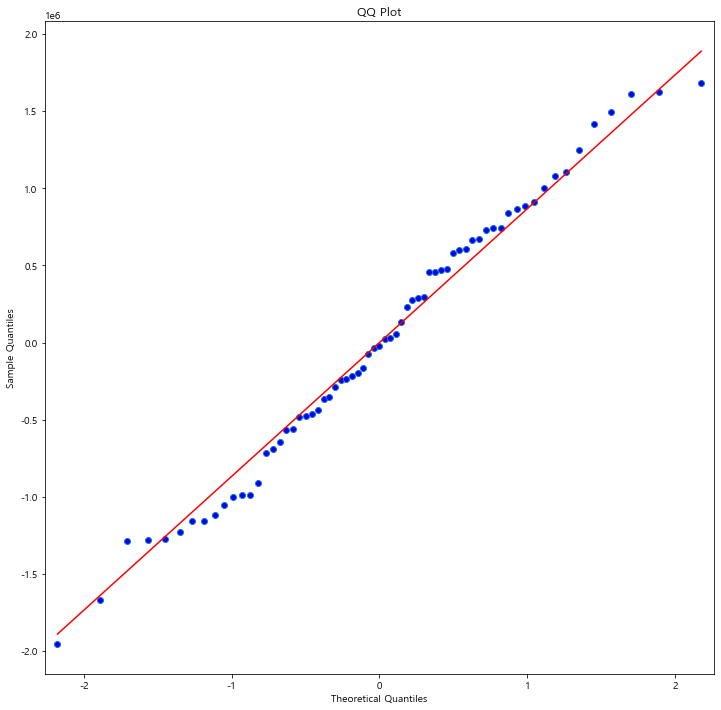

In [76]:
# (2) 확률오차의 정규성 확인

model_residuals = model_trained.resid

plt.rcParams['axes.unicode_minus'] = False  # 음수 폰트 깨짐 방지
fig, ax = plt.subplots(1, 1)
fig.set_figheight(12)
fig.set_figwidth(12)

sm.ProbPlot(model_residuals).qqplot(line='s', color='#1f77b4', ax=ax)
ax.title.set_text('QQ Plot')

C:\Users\0528x\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Fitted values'), Text(0, 0.5, 'Residuals')]

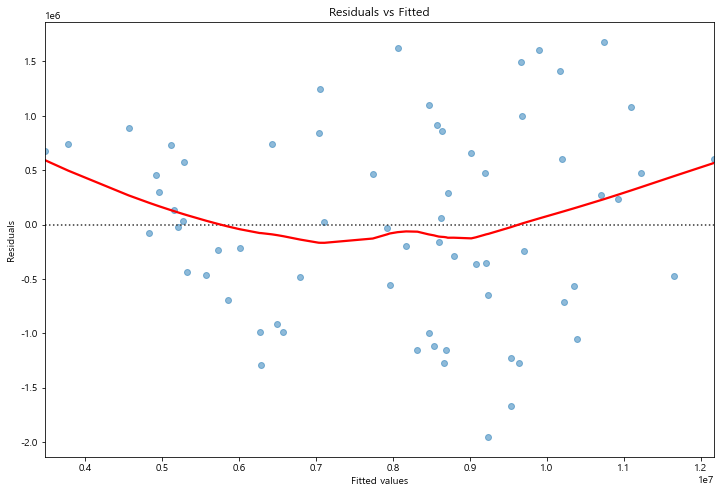

In [77]:
# (3) 확률 오차의 등분산성 확인

model_fitted_y = model_trained.fittedvalues

fig, ax = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(12)

sns.residplot(model_fitted_y, y_train, data=X_train, lowess=True,
             scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, ax=ax)
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted values', ylabel='Residuals')

In [78]:
# (4) 통계적으로 설명 (해석)
# - R-squared(결정계수): 모형의 성능
# - coef(회귀계수) : X가 한 단위 증가할 때, Y의 변화량
# - P > [t] (p-value) : 0.05(유의수준) 이하일 때 변수가 유의미

model_trained.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    수출액   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     48.95
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           2.99e-22
Time:                        14:24:54   Log-Likelihood:                -1011.2
No. Observations:                  67   AIC:                             2038.
Df Residuals:                      59   BIC:                             2056.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.904e+07   1.39e+07     -4.966      0.000   -9.69e+07   -4.12e+07
환율         -1.859e+04   3347.148     -5.554      0.000   -2.53e+04   -1.19e+04
소비자 물가지수     8.64e+05   1.07e+05      8.099      0.000    6.51e+05    1.08e+06
기준금리(연%)     6.21e+05   7.06e+05      0.879      0.383   -7.92e+05    2.03e+06
국제유가        1764.3989   1.74e+04      0.101      0.920   -3.31e+04    3.66e+04
항공 운임       -3.92e+05   3.35e+05     -1.170      0.247   -1.06e+06    2.78e+05
고용률(%)       1.57e+05   1.67e+05      0.940      0.351   -1.77e+05    4.91e+05
가동률지수(원지수)  3.082e+04   1.44e+04      2.134      0.037    1921.329    5.97e+04
==============================================================================
Omnibus:                        2.839   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                1.625
Skew:                          -0.022   Prob(JB):                        0.444
Kurtosis:                       2.238   Cond. No.                     1.43e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### p-value > 0.05인 피처 제외하기

p-value가 높은 순서대로 하나씩 넣어서 제외하기

In [79]:
# 모델 선언
model = sm.OLS(y_train, X_train.drop(['국제유가','고용률(%)','기준금리(연%)'], axis=1))

# 모델 학습
model_trained = model.fit()
model_trained.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    수출액   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     85.60
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           1.54e-24
Time:                        14:24:56   Log-Likelihood:                -1012.6
No. Observations:                  67   AIC:                             2035.
Df Residuals:                      62   BIC:                             2046.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.078e+07   7.07e+06     -8.599      0.000   -7.49e+07   -4.67e+07
환율         -1.918e+04   2786.278     -6.885      0.000   -2.48e+04   -1.36e+04
소비자 물가지수    8.967e+05   7.15e+04     12.535      0.000    7.54e+05    1.04e+06
항공 운임       -7.75e+05   1.85e+05     -4.180      0.000   -1.15e+06   -4.04e+05
가동률지수(원지수)  3.274e+04   1.11e+04      2.951      0.004    1.06e+04    5.49e+04
==============================================================================
Omnibus:                        2.505   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.286   Jarque-Bera (JB):                1.531
Skew:                          -0.050   Prob(JB):                        0.465
Kurtosis:                       2.266   Cond. No.                     7.26e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 5. 예측 : 미래의 반응변수 값 예측하기

In [80]:
X_test = sm.add_constant(X_test)

C:\Users\0528x\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [81]:
print(y_train.max())
print(y_train.min())

12780662
4151085


In [82]:
print(y_train_pred.max())
print(y_train_pred.min())

12167593.483085092
3723900.803806388


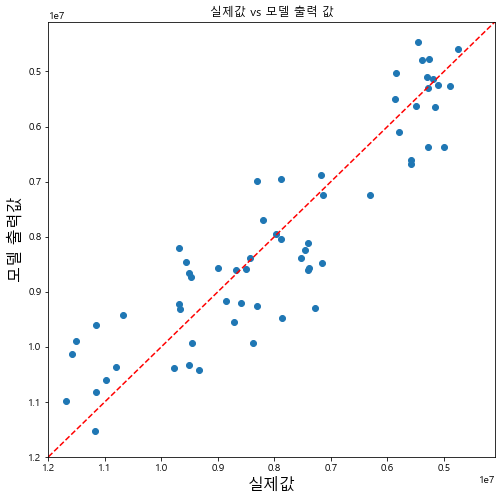

In [83]:
y_train_pred = model_trained.fittedvalues

plt.figure(figsize=(8, 8))
plt.title('실제값 vs 모델 출력 값')
plt.scatter(y_train, y_train_pred)
plt.plot([1.2e7, 4.1e6], [1.2e7, 4.1e6], ls='--', c='red')
plt.xlabel('실제값', size=16)
plt.ylabel('모델 출력값', size=16)
plt.xlim(1.2e7, 4.1e6)
plt.ylim(1.2e7, 4.1e6)
plt.show()

In [84]:
y_test_pred = model_trained.predict(X_test.drop(['국제유가','고용률(%)','기준금리(연%)'], axis=1))
y_test_pred.head() # 예측 결과

40    1.008720e+07
42    9.324645e+06
49    8.591187e+06
37    9.563306e+06
20    7.310451e+06
dtype: float64

`수출액 = -1.918e+04 * 환율 + 8.967e+05 * 소비자물가지수 - 7.75e+05 * 항공운임 + 3.274e+04 * 가동률지수(원지수) - 6.078e+07`

### 6. 해당 모델의 성능 정량적 지표로 도출

In [85]:
## 학습용 데이터셋
print('학습용 데이터셋 결과')

# MSE (평균 제곱 오차)
print('MSE: {:.3f}'.format(mean_squared_error(y_train, y_train_pred)))

# RMSE (제곱근 평균 제곱 오차)
print('RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_train, y_train_pred))))

# MAE (평균 절대 오차)
print('MAE: {:.3f}'.format(mean_absolute_error(y_train, y_train_pred)))

# R2_Score (결정계수)
print('R2_Score: {:.3f}'.format(r2_score(y_train, y_train_pred)))

학습용 데이터셋 결과
MSE: 785942374271.023
RMSE: 886533.910
MAE: 734197.529
R2_Score: 0.847


In [86]:
## 테스트용 데이터셋
print('테스트용 데이터셋 결과')

# MSE (평균 제곱 오차)
print('MSE: {:.3f}'.format(mean_squared_error(y_test, y_test_pred)))

# RMSE (제곱근 평균 제곱 오차)
print('RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_test_pred))))

# MAE (평균 절대 오차)
print('MAE: {:.3f}'.format(mean_absolute_error(y_test, y_test_pred)))

# R2_Score (결정계수)
print('R2_Score: {:.3f}'.format(r2_score(y_test, y_test_pred)))

테스트용 데이터셋 결과
MSE: 908456677417.802
RMSE: 953129.937
MAE: 850090.083
R2_Score: 0.798


# Linear Regression 사용

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

lr = LinearRegression()

# print(lr.get_params().keys())
# dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

param_grid = {'fit_intercept': [True, False],
             'normalize': [False, True],
             }

grid_lr = GridSearchCV(lr, param_grid=param_grid, cv=3, refit=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=121)

grid_lr.fit(X_train, y_train)
y_pred = grid_lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('최적의 파라미터', grid_lr.best_params_)
print('최고 성능', grid_lr.best_score_)


print('mse:', mse)
print('r2_score:', r2)

최적의 파라미터 {'fit_intercept': True, 'normalize': False}
최고 성능 0.8177375791227542
mse: 939593363434.8562
r2_score: 0.7974336751400645


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=121)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred2 = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

print('mse:', mse)
print('r2_score:', r2)

mse: 939593363434.8562
r2_score: 0.7974336751400645


In [89]:
lr.coef_

array([-1.86463843e+04,  8.52031478e+05,  6.02041207e+05, -5.10082252e+02,
       -3.94249523e+05,  1.52114114e+05,  3.76588830e+04])

In [90]:
lr.intercept_

-68062416.47478786

# 실제 2022년 1~2월 데이터 회귀식에 대입해보기

In [91]:
# 환율 2022-2월 데이터는 우리은행 외환센터 2022년 2월 평균 매매기준율 데이터사용
# 반도체 항공운임 2022-1~2월 데이터는 최근 2년 평균치 사용

# 수출액 = -1.889e+04 * 환율 + 8.713e+05 * 소비자물가지수 + -7.532e+05 * 항공운임 + 3.995e+04 * 가동률지수(원지수) + -5.94e+07

test_set = pd.read_csv('datasets/Test_반도체.csv')
test_set

,시점,수출액,수입액,환율,소비자 물가지수,기준금리(연%),항공운임,가동률지수(원지수),고용률
0,2022.01,10816657,5739959,1205.50,104.69,1.25,2.79,122.9,59.6
1,2022.02,10381788,5493588,1197.83,105.30,1.25,2.85,122.6,60.6


**2022년 1월**

In [92]:
exports_2022_01 = -1.918e+04 * test_set.iloc[0,3] + 8.967e+05 * test_set.iloc[0,4] - 7.75e+05 * test_set.iloc[0,6] + 3.274e+04 * test_set.iloc[0,7] - 6.078e+07

print('예측 2022년 1월 수출액:', int(exports_2022_01))
print('실제 2022년 1월 수출액:', test_set.iloc[0,1])

예측 2022년 1월 수출액: 11835529
실제 2022년 1월 수출액: 10816657


**2022년 2월**

In [93]:
exports_2022_02 = -1.918e+04 * test_set.iloc[1,3] + 8.967e+05 * test_set.iloc[1,4] - 7.75e+05 * test_set.iloc[1,6] + 3.274e+04 * test_set.iloc[1,7] - 6.078e+07

print('예측 2022년 2월 수출액:', int(exports_2022_02))
print('실제 2022년 2월 수출액:', test_set.iloc[1,1])

예측 2022년 2월 수출액: 12473304
실제 2022년 2월 수출액: 10381788
